<a href="https://colab.research.google.com/github/alwanfakhri/GlobalPopulation/blob/main/GlobalPopulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
sheet_url = "https://docs.google.com/spreadsheets/d/1pYme6SqnQQKfL3ePvoSquIQpzYUP2lY5xDaZi7COvZQ/edit?usp=sharing"
csv_export_url = sheet_url.replace("/edit?usp=sharing", "/export?format=csv")
df = pd.read_csv(csv_export_url)

In [3]:
df.head()

,country,year,population,netMigration,population_in_millions
0,Afghanistan,2023,42239854,-65846,42
1,Afghanistan,2022,41128771,-65846,41
2,Afghanistan,2021,40099462,-183672,40
3,Afghanistan,2020,38972230,166821,38
4,Afghanistan,2019,37769499,-8082,37


In [4]:
df.tail()

,country,year,population,netMigration,population_in_millions
11899,Zimbabwe,1964,4310332,-10064,4
11900,Zimbabwe,1963,4177931,-9369,4
11901,Zimbabwe,1962,4049778,-8931,4
11902,Zimbabwe,1961,3925952,-8582,3
11903,Zimbabwe,1960,3806310,-8256,3


In [5]:
df.shape

(11904, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11904 entries, 0 to 11903
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 11904 non-null  object
 1   year                    11904 non-null  int64 
 2   population              11904 non-null  int64 
 3   netMigration            11904 non-null  int64 
 4   population_in_millions  11904 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 465.1+ KB


In [7]:
df.sample()

,country,year,population,netMigration,population_in_millions
3247,El Salvador,1976,4166890,-31317,4


<Axes: >

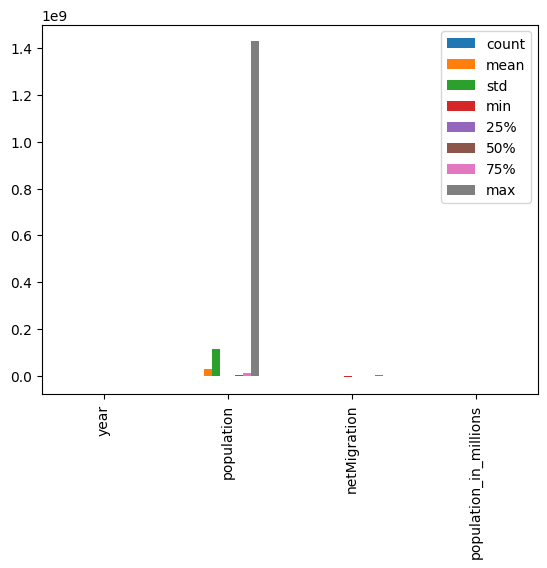

In [8]:
df.describe().T.plot(kind='bar')

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,11904,186,Afghanistan,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,11904.0,NaN,NaN,NaN,1991.5,18.473729,1960.0,1975.75,1991.5,2007.25,2023.0
population,11904.0,NaN,NaN,NaN,27038627.981687,112830459.167974,2646.0,597329.25,4342185.5,13337594.0,1428627663.0
netMigration,11904.0,NaN,NaN,NaN,748.250504,162103.456282,-6673580.0,-13252.5,-484.0,5505.5,3366387.0
population_in_millions,11904.0,NaN,NaN,NaN,26.618868,112.812944,0.0,0.0,4.0,13.0,1428.0


In [10]:
df.columns.to_list()

['country', 'year', 'population', 'netMigration', 'population_in_millions']

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

,0
country,0
year,0
population,0
netMigration,0
population_in_millions,0


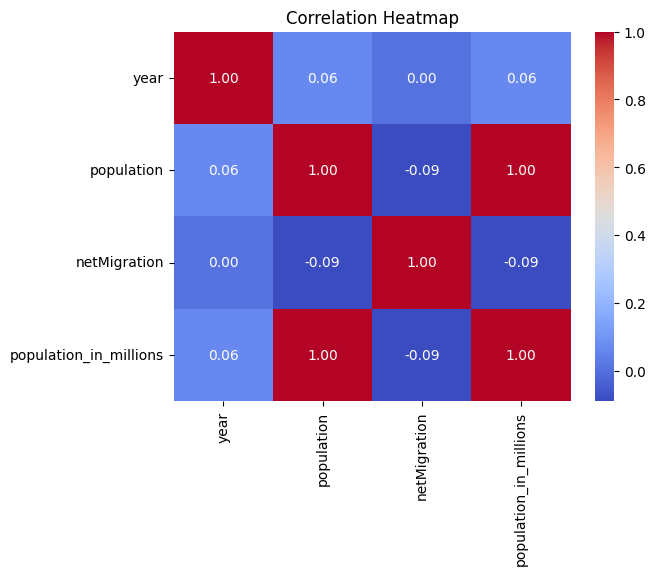

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

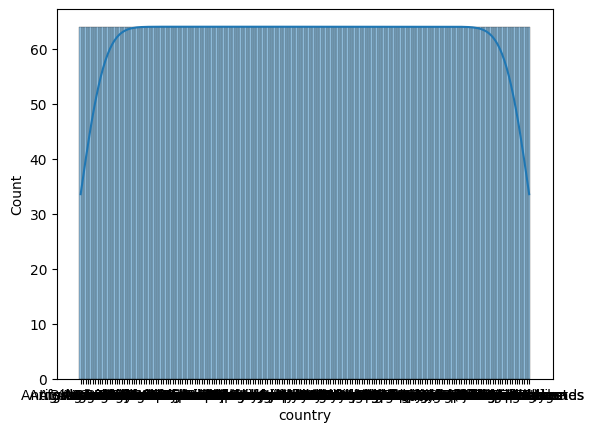

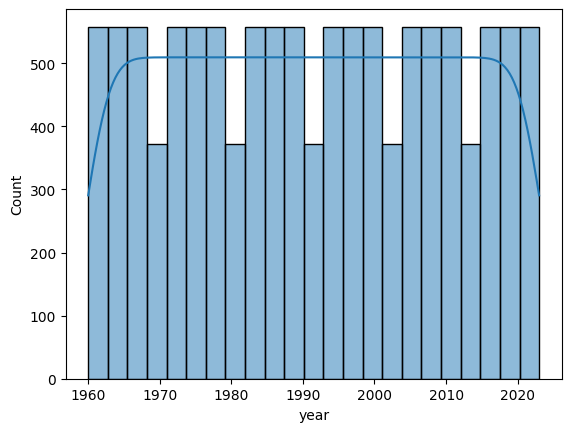

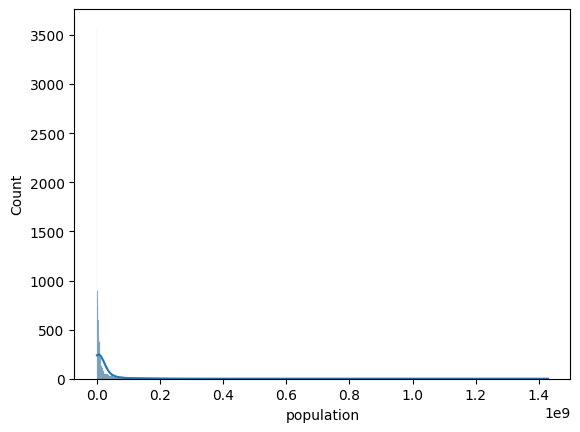

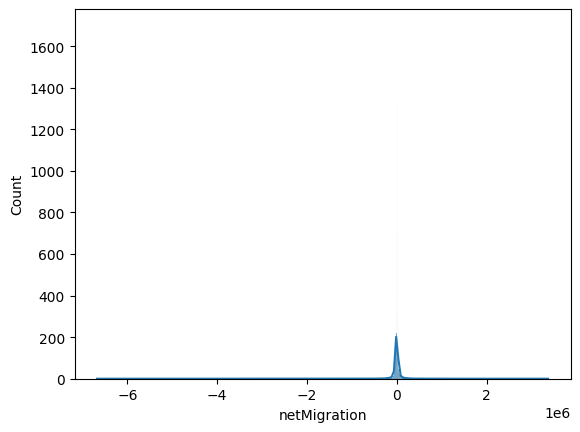

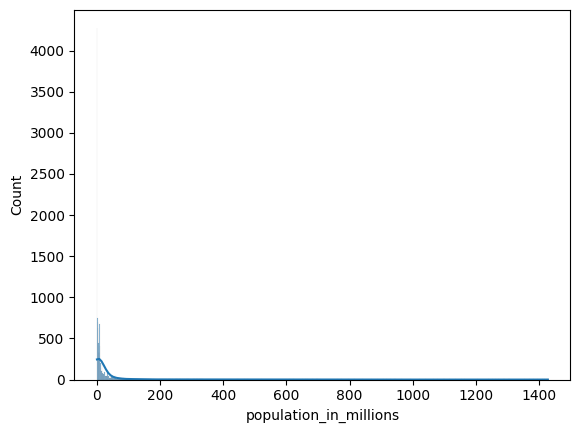

In [14]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

In [15]:
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns =['country', 'year', 'population', 'netMigration', 'population_in_millions']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue

        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']

            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )

            # Show the figure
            fig.show()

        # For numerical data
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )

            # Show the figure
            fig.show()

    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

In [16]:
df

,country,year,population,netMigration,population_in_millions
0,Afghanistan,2023,42239854,-65846,42
1,Afghanistan,2022,41128771,-65846,41
2,Afghanistan,2021,40099462,-183672,40
3,Afghanistan,2020,38972230,166821,38
4,Afghanistan,2019,37769499,-8082,37
...,...,...,...,...,...
11899,Zimbabwe,1964,4310332,-10064,4
11900,Zimbabwe,1963,4177931,-9369,4
11901,Zimbabwe,1962,4049778,-8931,4
11902,Zimbabwe,1961,3925952,-8582,3
